In [1]:
%matplotlib inline
import GPy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.lines as mlines

GPy.plotting.change_plotting_library('matplotlib')

In [7]:
kern1 = GPy.kern.RBF(input_dim=2, variance=100, lengthscale=1000)#**GPy.kern.Coregionalize(1,output_dim=3, rank=1)
kern2 = GPy.kern.RBF(input_dim=2, variance=100, lengthscale=1000)#**GPy.kern.Coregionalize(1,output_dim=3, rank=1)
kern3 = GPy.kern.RBF(input_dim=2, variance=100, lengthscale=1000)#**GPy.kern.Coregionalize(1,output_dim=3, rank=1)

display(kern1)


rbf.,value,constraints,priors
variance,100.0,+ve,
lengthscale,1000.0,+ve,


In [6]:
vel = np.loadtxt('hornsrev_data_VxVy.txt')
inp = np.loadtxt('hornsrev_data_alphaxy.txt')
Y1 = np.array(vel[:80,0])
Y1 = Y1[:,None]
#print Y1
Y2 = np.array(vel[:80,1])
Y2 = Y2[:,None]
Ymag=np.square(Y2)+np.square(Y1)
X = np.array(inp[:80,[1,2]])
X1 = np.array(inp[:80,1])
X2 = np.array(inp[::80,2])
#X = np.transpose(X)
#print X

X = X-X.mean(axis=0, keepdims=True)



In [8]:
model1 = GPy.models.GPRegression(X, Y1, kern1)
model1.optimize()
display(model1)

model2 = GPy.models.GPRegression(X, Y2, kern2)
model2.optimize()
display(model2)

modelmag = GPy.models.GPRegression(X, Ymag, kern3)
modelmag.optimize()
display(modelmag)

 /opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


GP_regression.,value,constraints,priors
rbf.variance,27.2416018502,+ve,
rbf.lengthscale,3640.43676176,+ve,
Gaussian_noise.variance,0.0320566921085,+ve,


GP_regression.,value,constraints,priors
rbf.variance,2.09879778173,+ve,
rbf.lengthscale,3484.72758126,+ve,
Gaussian_noise.variance,0.00302458629122,+ve,


GP_regression.,value,constraints,priors
rbf.variance,1332.58421386,+ve,
rbf.lengthscale,1313.54103135,+ve,
Gaussian_noise.variance,1.75999673422,+ve,


 /opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


AttributeError: 'Poly3DCollection' object has no attribute '_edgecolors2d'

 /opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


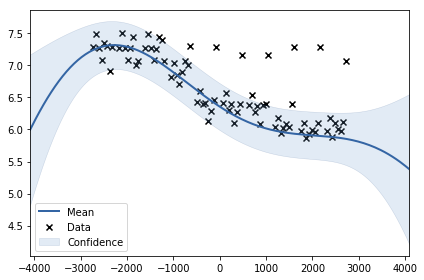

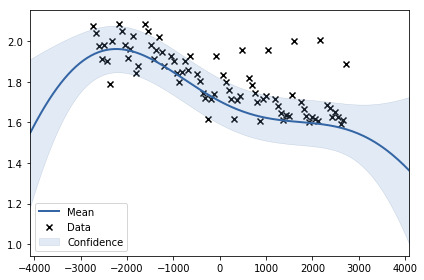

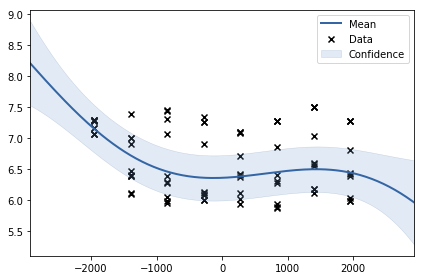

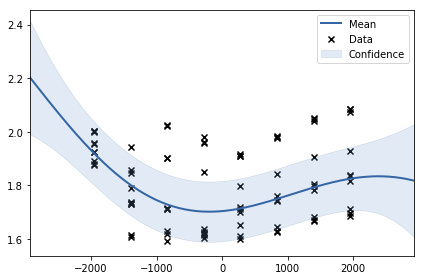

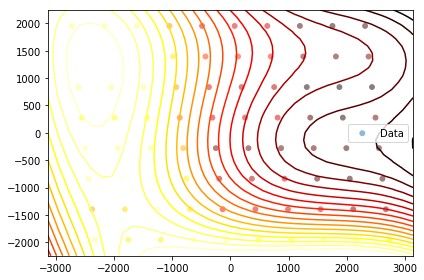

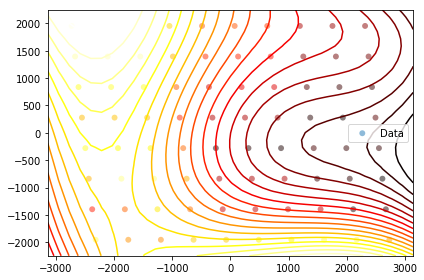

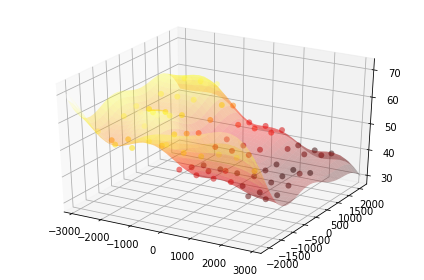

In [11]:
for i in range(2):
    model1.plot(visible_dims=[i])
    model2.plot(visible_dims=[i])
model1.plot()
model2.plot()
modelmag.plot(projection="3d")